In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [2]:
df=pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.drop(index=99832, inplace=True)

In [7]:
df.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay'],inplace=True,axis=1)
df.drop(['Neighbourhood'],inplace=True,axis=1)

In [8]:
df

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...
110522,F,56,0,0,0,0,0,1,No
110523,F,51,0,0,0,0,0,1,No
110524,F,21,0,0,0,0,0,1,No
110525,F,38,0,0,0,0,0,1,No


In [9]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)

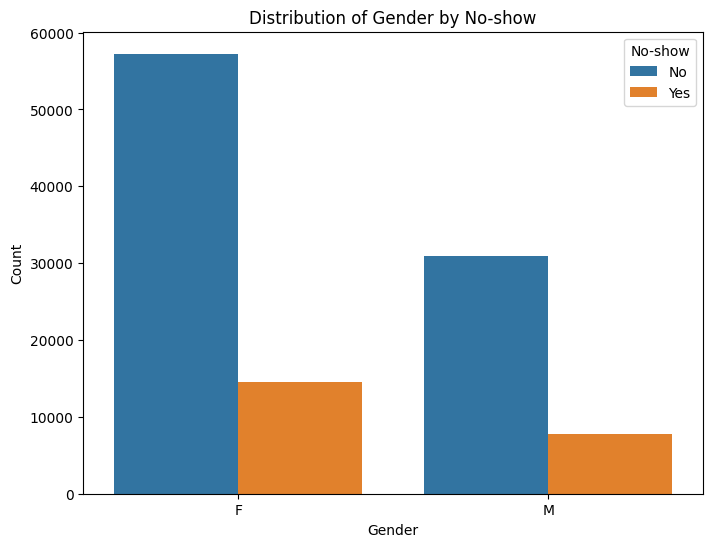

In [10]:
# Assuming your target variable is 'No-show' and the categorical feature is 'Gender'
# Separate features (X) and target variable (y)
X = df.drop('No-show', axis=1)
y = df['No-show']

# Plot a count plot showing the distribution of 'Gender' with respect to 'No-show'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='No-show', data=df)
plt.title("Distribution of Gender by No-show")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

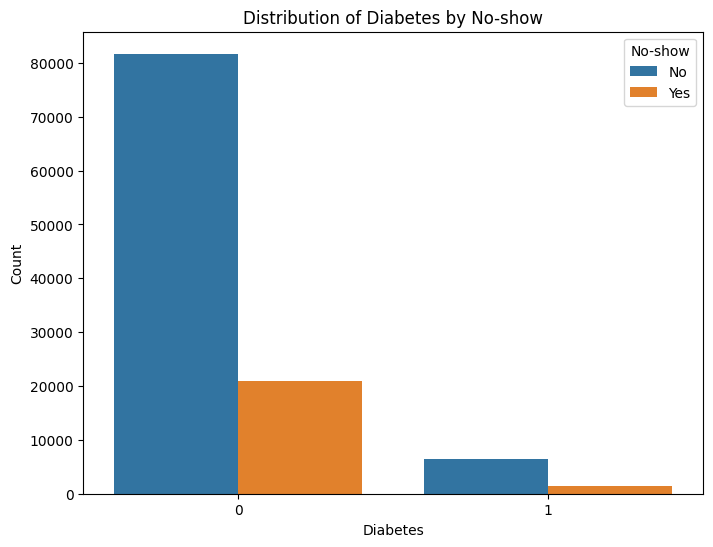

In [56]:
# Assuming your target variable is 'No-show' and the categorical feature is 'Gender'
# Separate features (X) and target variable (y)
X = df.drop('No-show', axis=1)
y = df['No-show']

# Plot a count plot showing the distribution of 'Gender' with respect to 'No-show'
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes', hue='No-show', data=df)
plt.title("Distribution of Diabetes by No-show")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

In [57]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

In [58]:
df = pd.get_dummies(df, columns=['Gender'])

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming your target variable is 'No-show'
# Separate features (X) and target variable (y)
X = df.drop('No-show', axis=1)
y = df['No-show']

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importance:")
print(importance_df)


Feature Importance:
        Feature  Importance
0           Age    0.661531
6  SMS_received    0.209967
5       Handcap    0.030641
4    Alcoholism    0.021014
3      Diabetes    0.020941
2  Hypertension    0.020757
1   Scholarship    0.020213
7      Gender_F    0.007677
8      Gender_M    0.007261


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

age_column = df['Age'].values.reshape(-1, 1)

normalized_age = scaler.fit_transform(age_column)

df['Age'] = normalized_age

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Age           110526 non-null  float64
 1   Scholarship   110526 non-null  int64  
 2   Hypertension  110526 non-null  int64  
 3   Diabetes      110526 non-null  int64  
 4   Alcoholism    110526 non-null  int64  
 5   Handcap       110526 non-null  int64  
 6   SMS_received  110526 non-null  int64  
 7   No-show       110526 non-null  int64  
 8   Gender_F      110526 non-null  bool   
 9   Gender_M      110526 non-null  bool   
dtypes: bool(2), float64(1), int64(7)
memory usage: 7.8 MB


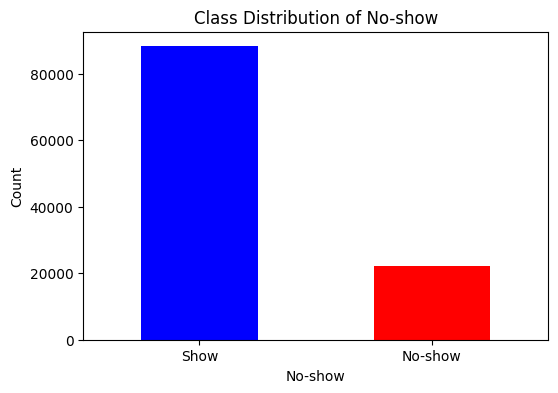

Class Distribution:
No-show
0    88207
1    22319
Name: count, dtype: int64


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Assuming the target variable is 'No-show'

# Count occurrences of each class
class_distribution = df['No-show'].value_counts()

# Visualize class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution of No-show')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.xticks([0, 1], ['Show', 'No-show'], rotation=0)
plt.show()

# Print class distribution counts
print("Class Distribution:")
print(class_distribution)


In [63]:
df

columns_to_encode = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

encoded_df = pd.get_dummies(df, columns=columns_to_encode)


In [64]:
df = encoded_df

In [65]:
df

,Age,No-show,Gender_F,Gender_M,Scholarship_0,Scholarship_1,Hypertension_0,Hypertension_1,Diabetes_0,Diabetes_1,Alcoholism_0,Alcoholism_1,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_0,SMS_received_1
0,0.539130,0,True,False,True,False,False,True,True,False,True,False,True,False,False,False,False,True,False
1,0.486957,0,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
2,0.539130,0,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
3,0.069565,0,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
4,0.486957,0,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0.486957,0,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True
110523,0.443478,0,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True
110524,0.182609,0,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True
110525,0.330435,0,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True


In [66]:
X = df.drop('No-show', axis=1)
y = df['No-show']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train

,Age,Gender_F,Gender_M,Scholarship_0,Scholarship_1,Hypertension_0,Hypertension_1,Diabetes_0,Diabetes_1,Alcoholism_0,Alcoholism_1,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_0,SMS_received_1
58187,0.217391,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
5095,0.539130,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
67919,0.565217,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
2861,0.356522,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
45949,0.530435,False,True,True,False,False,True,True,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,0.547826,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,False,True
110269,0.156522,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
103695,0.521739,False,True,True,False,False,True,True,False,True,False,True,False,False,False,False,True,False
860,0.156522,True,False,False,True,True,False,True,False,True,False,True,False,False,False,False,True,False


In [75]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

report = classification_report(y_test, y_pred, output_dict=True)
# Format and print the classification report
print("Classification Report:")
print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Class", "Precision", "Recall", "F1-Score", "Support"))
for class_label, metrics in report.items():
    if class_label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print("{:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15}".format(class_label, 
                                                                metrics['precision'], 
                                                                metrics['recall'], 
                                                                metrics['f1-score'], 
                                                                metrics['support']))

Classification Report:
Class           Precision       Recall          F1-Score        Support        
0               0.80            0.99            0.89            17715          
1               0.35            0.02            0.04            4391           


In [77]:
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
(tn, fp, fn, tp)

(17533, 182, 4292, 99)

In [95]:
y_test.value_counts()

No-show
0    17715
1     4391
Name: count, dtype: int64

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

report = classification_report(y_test, y_pred, output_dict=True)
# Format and print the classification report
print("Classification Report:")
print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Class", "Precision", "Recall", "F1-Score", "Support"))
for class_label, metrics in report.items():
    if class_label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print("{:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15}".format(class_label, 
                                                                metrics['precision'], 
                                                                metrics['recall'], 
                                                                metrics['f1-score'], 
                                                                metrics['support']))

Classification Report:
Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            17715          
1               0.00            0.00            0.00            4391           


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
(tn, fp, fn, tp)

(17715, 0, 4391, 0)

In [ ]:
# threshold change for logistic regression

# changing threshold and predicting 
print('prediction with new threshold :') 
y_pred_new_threshold = (model.predict_proba(X_test)[:, 1] >= 0.2).astype(int) 
print(y_pred_new_threshold)


# getting uniqute values of y_pred
from collections import Counter
value_counts = Counter(y_pred_new_threshold)

print("Count of unique values:")
for value, count in value_counts.items():
    print(f"{value}: {count}")
    
# prit confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)
tn, fp, fn, tp = conf_matrix.ravel()
(tn, fp, fn, tp)

In [29]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [32]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

In [34]:
print("Classification Metrics for All Hyperparameter Combinations:")
for params, mean_score, std_score in zip(grid_result.cv_results_['params'],
                                          grid_result.cv_results_['mean_test_score'],
                                          grid_result.cv_results_['std_test_score']):
    model.set_params(**params)  # Set hyperparameters for the model
    model.fit(X, y)  # Fit the model on the entire dataset
    y_pred = model.predict(X_test)  # Predictions on the same dataset
    report = classification_report(y, y_pred, output_dict=True)
    
    print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Class", "Precision", "Recall", "F1-Score", "Support"))
    for class_label, metrics in report.items():
        if class_label in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        print("{:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15}".format(class_label, 
                                                                    metrics['precision'], 
                                                                    metrics['recall'], 
                                                                    metrics['f1-score'], 
                                                                    metrics['support']))

Classification Metrics for All Hyperparameter Combinations:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          
Class           Precision       Recall          F1-Score        Support        
0               0.80            1.00            0.89            88207          
1               0.00            0.00            0.00            22319          


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
